In [60]:
#import dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
#sets plot styles to match jupyter theme
jtplot.style('grade3')

# Set the folder path where the CSV files are located
folderpath = 'game_data_watched'

# Get a list of all CSV files in the folder
csv_files = [f for f in os.listdir(folderpath) if f.endswith('.csv')]

# Loop through each CSV file and read it into a DataFrame
dfs = []
for csv_file in csv_files:
    file_path = os.path.join(folderpath, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
category_df = pd.concat(dfs, ignore_index=True)

In [61]:
category_df.head()

,Year,Game,Watch time (mins),Stream time (mins),Peak viewers,Peak channels,Streamers,Average viewers,Average channels,Average viewer ratio,Language
0,2018,League of Legends,2678686860,30452220,108695,204,20150,5097,57,87.96,Chinese
1,2018,Hearthstone,1741260840,4863600,37559,85,4988,3313,9,358.02,Chinese
2,2018,Music,1603313160,2318040,13085,11,699,3050,4,691.67,Chinese
3,2018,PUBG: BATTLEGROUNDS,1451157480,24016320,47270,225,16890,2761,45,60.42,Chinese
4,2018,IRL,1284889440,11018040,28782,109,9692,2444,20,116.62,Chinese


In [62]:
#iolsate total watch time
language_year = category_df.groupby(['Year','Language']).sum()
language_year_df = pd.DataFrame(language_year).reset_index()
language_year_df.head()

,Year,Language,Watch time (mins),Stream time (mins),Peak viewers,Peak channels,Streamers,Average viewers,Average channels,Average viewer ratio
0,2018,Chinese,10313140740,101212200,333438,1389,75296,19619,188,1663.16
1,2018,English,163450684320,4312950900,5524784,44675,5940797,311010,8202,831.12
2,2018,Korean,20426595360,246518760,653600,3731,161135,38862,465,1118.36
3,2018,Portuguese,15674231700,221905140,529305,1727,329203,29821,420,904.38
4,2020,English,232595588220,4478863740,5182286,48629,7282544,441369,8493,662.07


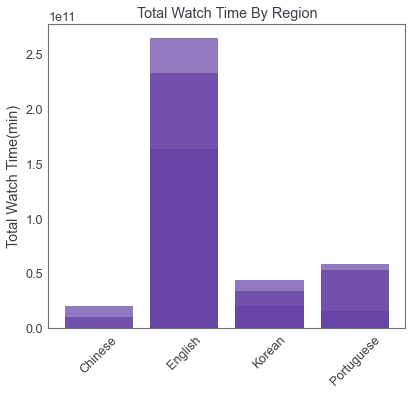

In [63]:
#bar graph for total watch time
#make the year side by side somehow??
x_axis = language_year_df['Language']
y_axis = language_year_df['Watch time (mins)']

fig1 = plt.bar(x_axis,y_axis,color = "#6441A5", alpha = 0.70)
plt.xticks(rotation =45)

plt.title('Total Watch Time By Region')
plt.ylabel('Total Watch Time(min)')
plt.grid()

In [123]:
#category stats - 2018 category following trend over 3 years 
#filters category to 2018 and language = english
top_2018_eng = category_df.loc[(category_df['Year'] == 2018) & 
                                (category_df['Language'] == 'English')]
#Gets most watched game in 2018
top_2018_eng = top_2018_eng.sort_values(by='Watch time (mins)', ascending = False).reset_index()
#grabs the top game in 2018
top_2018_eng = top_2018_eng.drop(index=range(1,len(top_2018_eng)))
game_en_18 = top_2018_eng
game_en_18 =pd.DataFrame(game_en_18)

In [122]:
#filters category to 2018 and language = english
top_2020_eng = category_df.loc[(category_df['Year'] == 2020) & 
                                (category_df['Language'] == 'English')]
#get 2018 most streamed game data for 2020
#find a way to not hard code 'Fortnite'
game_en_20 = top_2020_eng[(top_2020_eng['Game'] == 'Fortnite')]
game_en_20 =pd.DataFrame(game_en_20)

In [124]:
#filters category to 2022 and language = english
top_2022_eng = category_df.loc[(category_df['Year'] == 2022) & 
                                (category_df['Language'] == 'English')]
#get 2018 most streamed game data for 2020
game_en_22 = top_2022_eng[(top_2022_eng['Game'] == 'Fortnite')]
game_en_22 =pd.DataFrame(game_en_22)

In [132]:
#plot all the datasets in one
top_2018 = pd.concat([game_en_18,game_en_20,game_en_22],ignore_index = True).drop(columns = 'index')
top_2018

,Year,Game,Watch time (mins),Stream time (mins),Peak viewers,Peak channels,Streamers,Average viewers,Average channels,Average viewer ratio,Language
0,2018,Fortnite,57452902740,2493400380,1167839,12546,3270675,109321,4744,23.04,English
1,2020,Fortnite,29913864120,1060402800,517419,13137,2235117,56764,2012,28.21,English
2,2022,Fortnite,18916930920,1533362820,572725,33051,2552005,35995,2917,12.34,English


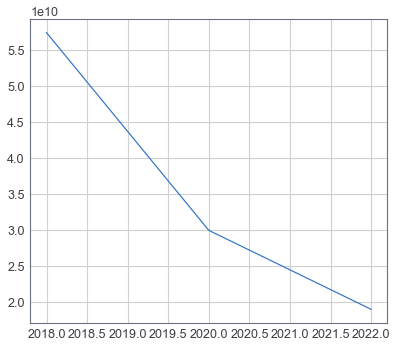

In [135]:
#graph english top
x_axis = top_2018['Year']
y_axis = top_2018['Watch time (mins)']

fig2 = plt.plot(x_axis,y_axis)

In [101]:
#category stats - 2018 category following trend over 3 years 
#filters category to 2018 and language = chinese
top_2018_cn = category_df.loc[(category_df['Year'] == 2018) & 
                                (category_df['Language'] == 'Chinese')]
#Gets most watched game in 2018
top_2018_cn = top_2018_cn.sort_values(by='Watch time (mins)', ascending = False).reset_index()
#grabs the top game in 2018
top_2018_cn = top_2018_cn.drop(index=range(1,len(top_2018_cn)))

In [102]:
#category stats - 2018 category following trend over 3 years 
#filters category to 2018 and language = korean
top_2018_kr = category_df.loc[(category_df['Year'] == 2018) & 
                                (category_df['Language'] == 'Korean')]
#Gets most watched game in 2018
top_2018_kr = top_2018_kr.sort_values(by='Watch time (mins)', ascending = False).reset_index()
#grabs the top game in 2018
top_2018_kr = top_2018_kr.drop(index=range(1,len(top_2018_kr)))

In [103]:
#category stats - 2018 category following trend over 3 years 
#filters category to 2018 and language = portuguese
top_2018_pg = category_df.loc[(category_df['Year'] == 2018) & 
                                (category_df['Language'] == 'Portuguese')]
#Gets most watched game in 2018
top_2018_pg = top_2018_pg.sort_values(by='Watch time (mins)', ascending = False).reset_index()
#grabs the top game in 2018
top_2018_pg = top_2018_pg.drop(index=range(1,len(top_2018_pg)))